# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns


# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics



Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


==> ENTER YOUR RESPONSE HERE

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data[data.isna().any(axis=1)]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna()

In [10]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data[data.duplicated()]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


Check for and handle outliers.

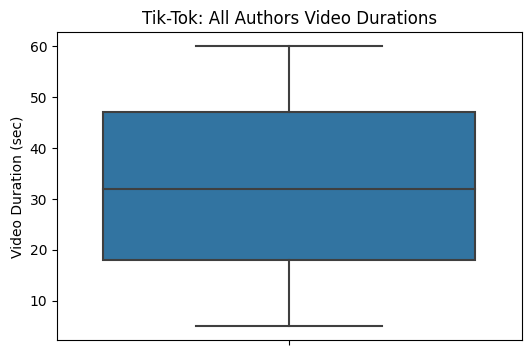

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(y='video_duration_sec',data=data,ax=ax)
ax.set_ylabel("Video Duration (sec)")
ax.set_title("Tik-Tok: All Authors Video Durations")
plt.show()


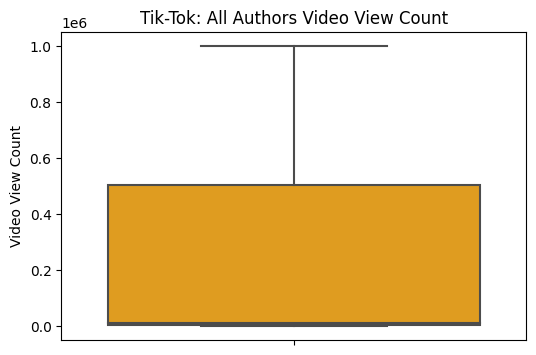

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(y='video_view_count',data=data,ax=ax,color='orange')
ax.set_ylabel("Video View Count")
ax.set_title("Tik-Tok: All Authors Video View Count")
plt.show()


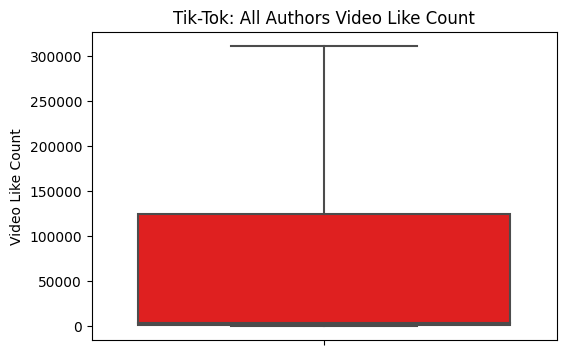

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(y='video_like_count',data=data,ax=ax,color='red',showfliers=False)
ax.set_ylabel("Video Like Count")
ax.set_title("Tik-Tok: All Authors Video Like Count")
plt.show()


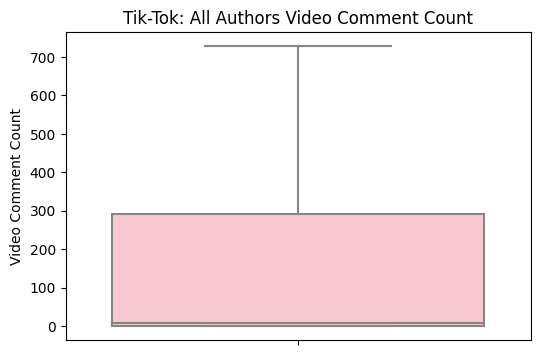

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(y='video_comment_count',data=data,ax=ax,color='pink',showfliers=False)
ax.set_ylabel("Video Comment Count")
ax.set_title("Tik-Tok: All Authors Video Comment Count")
plt.show()


In [16]:
# Check for and handle outliers for video_like_count
### YOUR CODE HERE ###
# Using the 1.5*IQR rule we classify outliers
IQR = data['video_like_count'].quantile(q=0.75) - data['video_like_count'].quantile(q=0.25)
upper = data['video_like_count'].quantile(q=0.75) + 1.5*IQR

print("Rows with outliers in video like counts:",data[data['video_like_count']>upper].shape[0])

# Drop outliers
data = data[data['video_like_count']<=upper]

Rows with outliers in video like counts: 1726


Check class balance.

In [17]:
# Check class balance for video_comment_count
### YOUR CODE HERE ###
data["verified_status"].value_counts(normalize=True)

not verified    0.933287
verified        0.066713
Name: verified_status, dtype: float64

Approximately 93.3% of the dataset represents videos posted by unverified accounts and 6.6% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [18]:
# Use resampling to create class balance in the outcome variable, if needed
from sklearn.utils import resample

# Identify data points from majority and minority classes
### YOUR CODE HERE ###
verified = data[data['verified_status']=='verified']
unverified = data[data['verified_status']=='not verified']

# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
minority_upsample = resample(verified,replace=True,n_samples=len(unverified),random_state=2)

# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
data_combined = pd.concat([unverified,minority_upsample]).reset_index(drop=True)

# Display new class counts
### YOUR CODE HERE ###
data_combined.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [19]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
data_combined[['verified_status','video_transcription_text']].groupby(['verified_status'])[["video_transcription_text"]].agg(lambda statements: np.mean([len(sentence) for sentence in statements])) 

,video_transcription_text
verified_status,
not verified,88.846543
verified,83.893765


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [20]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data_combined['video_transcription_length'] = [len(sentence) for sentence in data_combined['video_transcription_text']]


In [21]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
data_combined.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

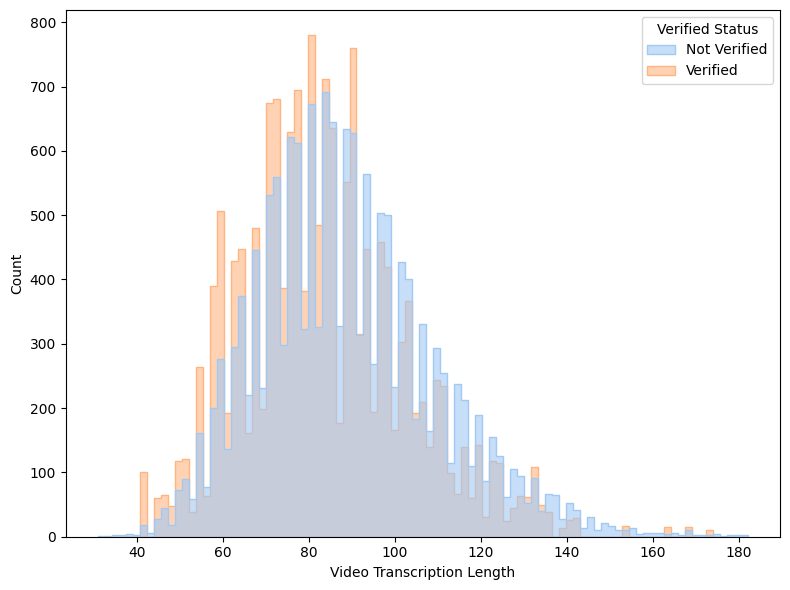

In [22]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x='video_transcription_length',hue='verified_status',data=data_combined,element='step',alpha=0.6,bins='fd',ax=ax,palette='pastel')
legend = ax.get_legend()
handles = legend.legend_handles
ax.legend(handles,['Not Verified','Verified'],title='Verified Status')
ax.set_xlabel("Video Transcription Length")
plt.tight_layout()

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [24]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
data_combined.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_length
#,1.000000,-0.000841,-0.013971,-0.678683,-0.616715,-0.531040,-0.524541,-0.448650,-0.171071
video_id,-0.000841,1.000000,0.020472,-0.000795,-0.001928,-0.007397,-0.000086,0.000110,-0.006467
video_duration_sec,-0.013971,0.020472,1.000000,0.015110,0.005410,0.008297,0.008452,-0.006440,-0.011825
video_view_count,-0.678683,-0.000795,0.015110,1.000000,0.797644,0.678896,0.669687,0.563679,0.226674
video_like_count,-0.616715,-0.001928,0.005410,0.797644,1.000000,0.853237,0.838601,0.714265,0.195050
video_share_count,-0.531040,-0.007397,0.008297,0.678896,0.853237,1.000000,0.710650,0.619923,0.157682
video_download_count,-0.524541,-0.000086,0.008452,0.669687,0.838601,0.710650,1.000000,0.859616,0.165448
video_comment_count,-0.448650,0.000110,-0.006440,0.563679,0.714265,0.619923,0.859616,1.000000,0.133958
video_transcription_length,-0.171071,-0.006467,-0.011825,0.226674,0.195050,0.157682,0.165448,0.133958,1.000000


Visualize a correlation heatmap of the data.

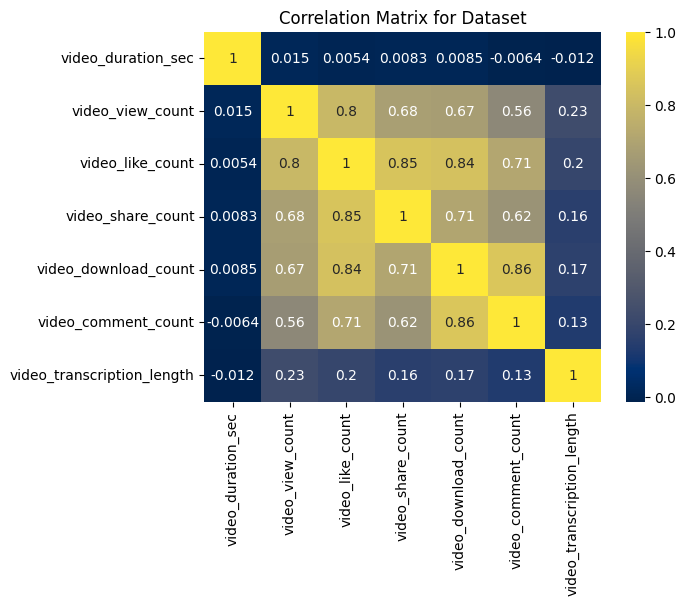

In [65]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
sns.heatmap(data_combined[['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count',
                            'video_comment_count','video_transcription_length']].corr(),annot=True,cmap='cividis')
plt.title("Correlation Matrix for Dataset")
plt.savefig("TT_Correlation_Matrix.png")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

**Aanswer:** We see that `video_like_count` has high correlation with several other enagement metrics, this will present an issue with the no-multicollinearity assumption therefore we should exclude this variable from the analysis. However, we can keep all the other engagement metrics such as `video_view_count`, `video_share_count`, `video_download_count`, `video_comment_count`. Another interesting variable to consider for this analysis would be the `video_transcription_length` which has very little correlation with all the other engagement metric variables.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [27]:
# Select outcome variable
### YOUR CODE HERE ###
Y = data_combined[['verified_status']]

Select the features.

In [28]:
# Select features
### YOUR CODE HERE ###
X = data_combined[['video_view_count','video_share_count','video_download_count','video_comment_count','video_transcription_length','video_duration_sec','claim_status','author_ban_status']]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_view_count,video_share_count,video_download_count,video_comment_count,video_transcription_length,video_duration_sec,claim_status,author_ban_status
0,343296.0,241.0,1.0,0.0,97,59,claim,under review
1,140877.0,19034.0,1161.0,684.0,107,32,claim,active
2,902185.0,2858.0,833.0,329.0,137,31,claim,active
3,437506.0,34812.0,1234.0,584.0,131,25,claim,active
4,56167.0,4110.0,547.0,152.0,128,19,claim,active


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [29]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

Confirm that the dimensions of the training and testing sets are in alignment.

In [30]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print("X training set:",X_train.shape)
print("X testing set:",X_test.shape,"\n")
print("Y training set:",Y_train.shape)
print("Y testing set:",Y_test.shape)

X training set: (22680, 8)
X testing set: (9720, 8) 

Y training set: (22680, 1)
Y testing set: (9720, 1)


### **Task 3c. Encode variables**

Check the data types of the features.

In [31]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes

video_view_count              float64
video_share_count             float64
video_download_count          float64
video_comment_count           float64
video_transcription_length      int64
video_duration_sec              int64
claim_status                   object
author_ban_status              object
dtype: object

In [32]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
X_train['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [33]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
X_train['author_ban_status'].unique()

array(['active', 'banned', 'under review'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [34]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
X_train_encode = X_train[['author_ban_status','claim_status']]

# Display first few rows
### YOUR CODE HERE ###
X_train_encode.head()

,author_ban_status,claim_status
2945,active,claim
4553,active,claim
17722,active,opinion
31891,active,opinion
1801,active,claim


In [37]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
X_encoder = OneHotEncoder(drop='first', sparse=False)

In [38]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
X_train_encode = X_encoder.fit_transform(X_train_encode)

In [39]:
# Get feature names from encoder
### YOUR CODE HERE ###
X_encoder.get_feature_names_out()

array(['author_ban_status_banned', 'author_ban_status_under review',
       'claim_status_opinion'], dtype=object)

In [40]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
X_train_encode

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [41]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_train_encode_df = pd.DataFrame(X_train_encode,columns=X_encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_train_encode_df.head()

,author_ban_status_banned,author_ban_status_under review,claim_status_opinion
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0


In [42]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_train.head()

,video_view_count,video_share_count,video_download_count,video_comment_count,video_transcription_length,video_duration_sec,claim_status,author_ban_status
2945,655047.0,113582.0,4679.0,1007.0,103,17,claim,active
4553,534161.0,11846.0,116.0,57.0,76,6,claim,active
17722,6478.0,542.0,14.0,0.0,60,50,opinion,active
31891,4633.0,277.0,10.0,1.0,62,47,opinion,active
1801,727912.0,13236.0,426.0,155.0,99,14,claim,active


In [43]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True),X_train_encode_df],axis=1)

# Display first few rows
### YOUR CODE HERE ###
X_train_final.head()

,video_view_count,video_share_count,video_download_count,video_comment_count,video_transcription_length,video_duration_sec,author_ban_status_banned,author_ban_status_under review,claim_status_opinion
0,655047.0,113582.0,4679.0,1007.0,103,17,0.0,0.0,0.0
1,534161.0,11846.0,116.0,57.0,76,6,0.0,0.0,0.0
2,6478.0,542.0,14.0,0.0,60,50,0.0,0.0,1.0
3,4633.0,277.0,10.0,1.0,62,47,0.0,0.0,1.0
4,727912.0,13236.0,426.0,155.0,99,14,0.0,0.0,0.0


Check the data type of the outcome variable.

In [44]:
# Check data type of outcome variable
### YOUR CODE HERE ###
Y_train.dtypes

verified_status    object
dtype: object

In [45]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
Y_train['verified_status'].unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [46]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
Y_encoder = OneHotEncoder(drop='first')


In [47]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
Y_train_encode = Y_encoder.fit_transform(Y_train).toarray().ravel()

# Display the encoded training outcome variable
### YOUR CODE HERE ###
Y_train_encode

array([0., 0., 1., ..., 0., 0., 1.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [48]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
clf = LogisticRegression().fit(X_train_final,Y_train_encode)


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [49]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
X_test_encode = X_test[['author_ban_status','claim_status']]

# Display first few rows
### YOUR CODE HERE ###
X_test_encode.head()

,author_ban_status,claim_status
9872,active,opinion
2649,active,claim
3459,under review,claim
2906,active,claim
18014,active,opinion


In [52]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
X_test_encoder = OneHotEncoder(drop='first',sparse=False)
X_test_encode = X_test_encoder.fit_transform(X_test_encode)

# Display first few rows of encoded testing features
### YOUR CODE HERE ###
X_test_encode

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [53]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_test_encode_df = pd.DataFrame(X_test_encode,columns=X_test_encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_test_encode_df.head()

,x0_1.0,x1_1.0,x2_1.0
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,1.0


In [54]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_test = X_test.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True)
X_test.head()

,video_view_count,video_share_count,video_download_count,video_comment_count,video_transcription_length,video_duration_sec
0,584.0,40.0,1.0,0.0,68,47
1,873423.0,19833.0,320.0,11.0,72,41
2,858333.0,12429.0,1154.0,302.0,91,10
3,799502.0,6378.0,862.0,112.0,82,47
4,8225.0,213.0,12.0,2.0,60,50


In [55]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final = pd.concat([X_test,X_test_encode_df],axis=1)

# Display first few rows
### YOUR CODE HERE ###
X_test_final.head()

,video_view_count,video_share_count,video_download_count,video_comment_count,video_transcription_length,video_duration_sec,x0_1.0,x1_1.0,x2_1.0
0,584.0,40.0,1.0,0.0,68,47,0.0,0.0,1.0
1,873423.0,19833.0,320.0,11.0,72,41,0.0,0.0,0.0
2,858333.0,12429.0,1154.0,302.0,91,10,0.0,1.0,0.0
3,799502.0,6378.0,862.0,112.0,82,47,0.0,0.0,0.0
4,8225.0,213.0,12.0,2.0,60,50,0.0,0.0,1.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [56]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
Y_pred = clf.predict(X_test_final)

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x0_1.0
- x1_1.0
- x2_1.0
Feature names seen at fit time, yet now missing:
- author_ban_status_banned
- author_ban_status_under review
- claim_status_opinion

  warnings.warn(message, FutureWarning)


Display the predictions on the encoded testing set.

In [57]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
Y_pred

array([1., 0., 0., ..., 0., 1., 1.])

Display the true labels of the testing set.

In [58]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
Y_test

,verified_status
9872,not verified
2649,not verified
3459,not verified
2906,not verified
18014,verified
...,...
14743,not verified
5750,not verified
6290,not verified
14534,not verified


Encode the true labels of the testing set so it can be compared to the predictions.

In [59]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
Y_test_encode = Y_encoder.fit_transform(Y_test).toarray().ravel()

# Display the encoded testing outcome variable
Y_test_encode

array([0., 0., 0., ..., 0., 0., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [60]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print("Encoded X-test shape:",X_test_encode.shape)
print("Encoded Y-test shape:",Y_test_encode.shape,'\n')

print("Encoded X-train shape:",X_train_encode.shape)
print("Encoded Y-train shape:",Y_train_encode.shape)

Encoded X-test shape: (9720, 3)
Encoded Y-test shape: (9720,) 

Encoded X-train shape: (22680, 3)
Encoded Y-train shape: (22680,)


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

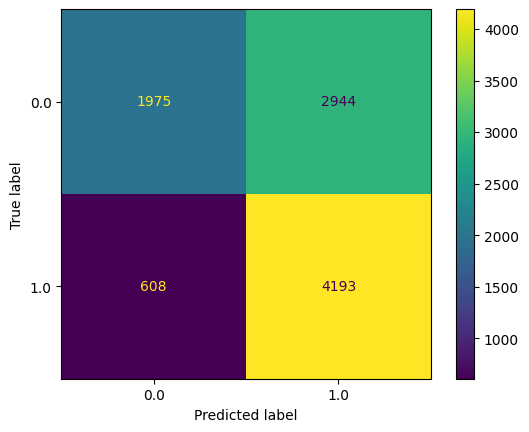

In [61]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(Y_test_encode, Y_pred, labels = clf.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.savefig("TT_Confusion_Matrix.png")
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [62]:
# Create a classification report
### YOUR CODE HERE ###
outcome_labels = ["Verified", "Not Verified"]
print(metrics.classification_report(Y_test_encode, Y_pred, target_names=outcome_labels))

              precision    recall  f1-score   support

    Verified       0.76      0.40      0.53      4919
Not Verified       0.59      0.87      0.70      4801

    accuracy                           0.63      9720
   macro avg       0.68      0.64      0.61      9720
weighted avg       0.68      0.63      0.61      9720



### **Task 4c. Interpret model coefficients**

In [63]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
pd.DataFrame(data={"Feature Name":clf.feature_names_in_, "Model Coefficient":clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_view_count,-0.000002
1,video_share_count,0.000003
2,video_download_count,-0.000224
3,video_comment_count,0.000328
4,video_transcription_length,0.002998
5,video_duration_sec,0.001309
6,author_ban_status_banned,-0.000003
7,author_ban_status_under review,-0.000003
8,claim_status_opinion,0.000062


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

Intresting enough the `video_transcription_length` has the highest coefficient, and also was the least covariant variable in the whole analysis. We also see that share counts and view counts have minimal effect on the `verified_status` of authors in the platform. However, the confusion matrix shows a concerning aspect of this model, which is the high number of false positives. This can also be seen in the precision score of 59%, which implies thi

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 